# Kernels en SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)#OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys, alpha = 0.60)

In [3]:
# import numpy as np

# import matplotlib.pyplot as plt

# import sklearn
# import sklearn.datasets
# import sklearn.linear_model
# import sklearn.neural_network

# import mlutils
# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline


In [4]:
# definimos una funcion que nos va a permitir generar datos no linealmente separables.

def load_dataset_disks(size, seed=39):    
    def get_sample_disk(from_, to, size):
        length = np.random.uniform(from_, to, size)
        angle = np.pi * np.random.uniform(0, 2, size)
        x = length * np.cos(angle)
        y = length * np.sin(angle)
        return np.array(list(zip(x,y)))

    np.random.seed(seed)
    size1 = int(size / 2)
    size2 = size - size1
    X = np.concatenate((get_sample_disk(0, 1, size1), get_sample_disk(1, 2, size2)))
    Y = np.concatenate((np.ones(size1), -np.ones(size2)))
    return X, Y

# SVMs (kernels)

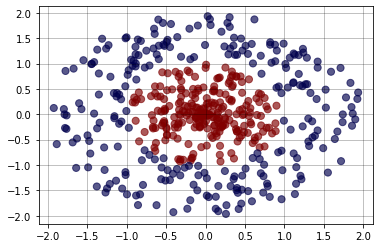

In [5]:
# creamos el dataset usando la función que definimos antes
X, Y = load_dataset_disks(500)

plt.scatter(X[:, 0],
            X[:, 1],
            c=Y,
            s=50,
            cmap=plt.cm.seismic,
            alpha = 0.65)
plt.grid(alpha = 0.3, color = 'black')
plt.show()

### `LinearSVM()`

Vamos a probar que sucede si aplicamos el algoritmo de Support vector machine sin hacer ninguna transformación

Accuracy: 52 


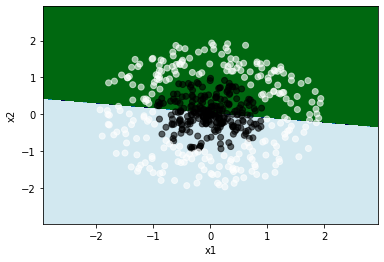

In [6]:
from sklearn.svm import LinearSVC
# 1. Instanciamos el modelo
clf = LinearSVC()

# 2. Entrenamos el modelo usando todos los datos X e Y
clf.fit(X,Y)

# 3. Utilizamos los mismos datos de entrenamiento para hacer la predicción
predictions = clf.predict(X)

# 4. Graficamos el resultado
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Claramente, como los datos no son linealmente separables, nunca vamos a obtener un buen clasificador si utiizamos un separador lineal y no aplicamos ninguna transformación kernel).

### `svm.SVC()`
Notar que NO vamos a usar la clase `LinearSVC` como en la notebook 05. 

En este caso vamos a usar la clase `SVC` que permite transformar los datos de entrada utilizando diferentes kernels:


**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’.<br>
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

In [7]:
# 1. Instanciamos el modelo especificando el kernel
clf = SVC(kernel = 'sigmoid',
          gamma = 'auto' # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
         )

# 2. Entrenamos el molo usando TODOS LOS datos.
clf.fit(X,Y)

SVC(gamma='auto', kernel='sigmoid')

Accuracy: 65 


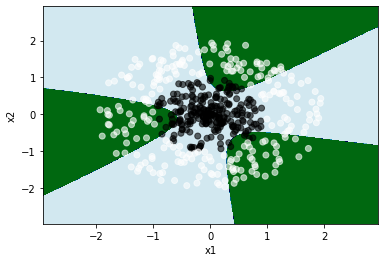

In [8]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Vemos que la trabsformación utilizando un kernel sigmoideo tampoco nos lleva a buenos resultados

### `kernel="rbf"`
Este kernel funciona bien con distribuciones de datos que tienen simetrías radiales.

In [9]:
# 1. Instanciamos el modelo definiendo un kernel 
clf = SVC(kernel="rbf",
                      C = 1,
                      gamma="auto"
                     )

# 2. Entrenamos el modelo utilizando todos los datos y sus etiquetas
clf.fit(X, Y)

SVC(C=1, gamma='auto')

Accuracy: 99 


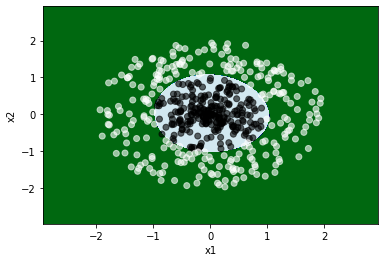

In [10]:
# 3. predecimos y graficamos el resultado
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Vemos que esta trasformación permite obtener datos que sí son linealmente separables. Cuando aplicamos la antitransformación y graficamos el resultado sobre un plano, vemos que la line de división se parece a un círculo.

### `kernel='poly'`

#### `degree = 3`

In [11]:
# 1. Instanciamos el modelo definiendo la transformación polinomial
clf = SVC(kernel="poly",
          degree = 3,   # por defecto transforma los datos con un polinomio de grado 3
          gamma="auto"
         )

# 2. Entrenamos el modelo utilizando todos los datos y sus etiquetas
clf.fit(X, Y);

Accuracy: 58 


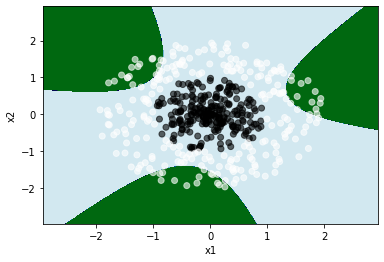

In [12]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

#### `degree = 2`
Ahora vamos a probar con un polinomio de grado 2. *a priori* esto debería funcionar mejor porque el efecto de esta transformación sería elevar los datos del centro más que los datos de los alrededores.

In [13]:
# 1. Instanciamos el modelo definiendo la transformación polinomial
clf = SVC(kernel="poly",
          degree = 2,   # cambiamos el grado del polinomio del kernel
          gamma="auto"
         )

# 2. Entrenamos el modelo utilizando todos los datos y sus etiquetas
clf.fit(X, Y)

SVC(degree=2, gamma='auto', kernel='poly')

Accuracy: 98 


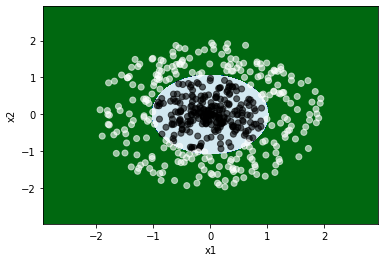

In [14]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

#### `degree = 4`


In [15]:
# 1. Instanciamos el modelo definiendo la transformación polinomial
clf = SVC(kernel="poly",
          degree = 4,   # cambiamos el grado del polinomio del kernel
          gamma="auto"
         )

# 2. Entrenamos el modelo utilizando todos los datos y sus etiquetas
clf.fit(X, Y)

SVC(degree=4, gamma='auto', kernel='poly')

Accuracy: 97 


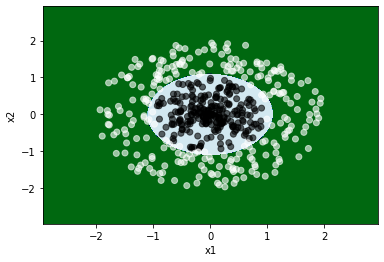

In [16]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

#### `degree = 5`


In [17]:
# 1. Instanciamos el modelo definiendo la transformación polinomial
clf = SVC(kernel="poly",
          degree = 5,   # cambiamos el grado del polinomio del kernel
          gamma="auto"
         )

# 2. Entrenamos el modelo utilizando todos los datos y sus etiquetas
clf.fit(X, Y)

SVC(degree=5, gamma='auto', kernel='poly')

Accuracy: 58 


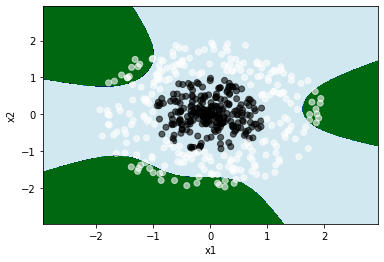

In [18]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

**Conclusión Kernels:** Las transformaciones con polinomios de grado 2 y 4, aumentan la dimensionalidad de los datos de forma tal que éstos se vuelven linealmente separables y es posible encontrar un hiperplano que separe las dos clases.

La transformación con polinomios de grado 3 y 5 no lo consiguen.

Un ejemplo interesante de uso de SVM: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

## Usemos conjunto de entrenamiento y de prueba

Vamos a seguir trabajando con el dataset X y con las etiquetas Y, pero ahora vamos a hacer la dicisión de entrenamiento y prueba.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 2), (400,), (100, 2), (100,))

In [20]:
X_train[:5]

array([[ 0.02991074, -0.00229132],
       [ 0.60184789,  1.00136907],
       [-0.35863974,  1.52090396],
       [-0.01437304,  0.1083941 ],
       [ 0.65865991, -0.76941353]])

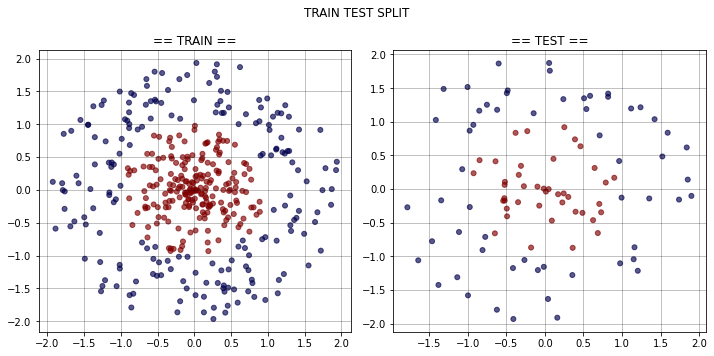

In [21]:
plt.figure(figsize=(10, 5))
plt.suptitle('TRAIN TEST SPLIT')
plt.subplot(1,2,1)
plt.scatter(x = X_train[:, 0],
            y = X_train[:, 1],
            c = y_train,
            s = 25,
            cmap=plt.cm.seismic,
            alpha = 0.65)

plt.grid(alpha = 0.3, color = 'black')
plt.title('== TRAIN ==')

plt.subplot(1,2,2)
plt.scatter(x = X_test[:, 0],
            y = X_test[:, 1],
            c = y_test,
            s = 25,
            cmap=plt.cm.seismic,
            alpha = 0.65)

plt.grid(alpha = 0.3, color = 'black')
plt.title('== TEST ==')

plt.tight_layout()
plt.show()

## Reporte de clasificación usnado el conjunto de datos de prueba

#### `kernel = 'sigmoid'`

In [22]:
# 1. Instanciamos el modelo SVC
clf = SVC(kernel = 'sigmoid',
          gamma = 'auto',
          )

# 2. Entrenamos el modelo utilizando los datos de entrenamiento
clf.fit(X_train,  # datos de entrenamiento
        y_train   # etiquetas de los datos de entrenamiento
       )

SVC(gamma='auto', kernel='sigmoid')

In [23]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.81      0.50      0.62        58
         1.0       0.55      0.83      0.66        42

    accuracy                           0.64       100
   macro avg       0.68      0.67      0.64       100
weighted avg       0.70      0.64      0.64       100



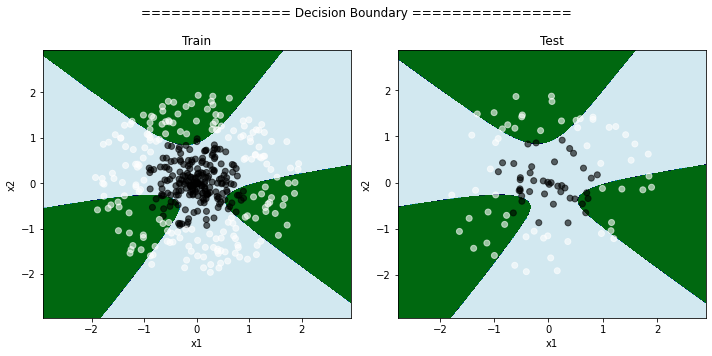

In [24]:
plt.figure(figsize=(10, 5))
plt.suptitle(' Decision Boundary '.center(50, '='))

# Train
plt.subplot(1,2,1)
plot_decision_boundary(lambda x: clf.predict(x), X_train.T, y_train.T)
plt.title('Train')

# Test
plt.subplot(1,2,2)
plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)
plt.title('Test')

plt.tight_layout()
plt.show()

#### `kernel = 'rbf'`

In [25]:
# 1. Instanciamos el modelo definiendo el hiperparámetro kernel = 'rbf'
clf = SVC(kernel = 'rbf',
         gamma = 'auto')

# 2. Entrenamos el modelo utilizando los datos de entrenamiento
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [26]:
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99        58
         1.0       0.98      1.00      0.99        42

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



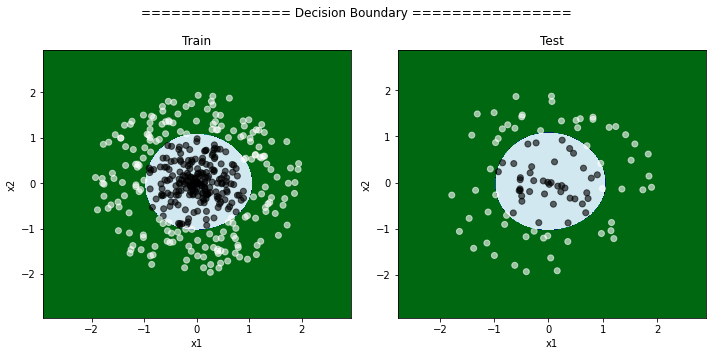

In [27]:
plt.figure(figsize=(10, 5))
plt.suptitle(' Decision Boundary '.center(50, '='))

# Train
plt.subplot(1,2,1)
plot_decision_boundary(lambda x: clf.predict(x), X_train.T, y_train.T)
plt.title('Train')

# Test
plt.subplot(1,2,2)
plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)
plt.title('Test')

plt.tight_layout()
plt.show()